# Supervised Learning: Linear Regression

In [ ]:
# the goal is to use the regression algorithm to predict diabetes 

## Import libraries

*   [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) provides data structures to work with relational (tabular) data.
*   [NumPy](https://numpy.org/) provides numerical computing tools (mathematical functions, linear algebra routines, etc.)
*   [Matplotlib](https://matplotlib.org/) allows to create visualizations.
*   [Seaborn](https://seaborn.pydata.org/) is based on Matplotlib. It provides a high-level interface for drawing graphics.
*   [scikit-learn](https://scikit-learn.org/) is a Python package for Machine Learning. It contains a lot of modules. Only those that are needed will be imported later in the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some settings for displaying data and for graphics
pd.set_option('display.max_columns', None)
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

## Import data

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website. In this lab the [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) will be used. It is loaded using [load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) function. By default, scaled data is returned.

Ten baseline variables were obtained for each of `442` diabetes patients, as well as the response of interest, a **quantitative measure of disease progression** one year after baseline.

**Features**:

*   `age` age in years
*   `sex`
*   `bmi` body mass index
*   `bp` average blood pressure
*   `s1` tc, total serum cholesterol
*   `s2` ldl, low-density lipoproteins
*   `s3` hdl, high-density lipoproteins
*   `s4` tch, total cholesterol / HDL
*   `s5` ltg, possibly log of serum triglycerides level
*   `s6` glu, blood sugar level

In [ ]:
from sklearn.datasets import load_diabetes

# Load data: feature variables (X) and target variable (y)
# scaled=False: to load original data and practice scaling
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)

# Rename columns to add semantics
X.columns = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']

# Display 10 first lines
X.head(10)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0


In [ ]:
# Display features along with the target
pd.concat([X,y], axis=1)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [ ]:
display(X.shape, y.shape)

(442, 10)

(442,)

There are 442 objects in total.

## Exploratory Data Analysis

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   tc      442 non-null    float64
 5   ldl     442 non-null    float64
 6   hdl     442 non-null    float64
 7   tch     442 non-null    float64
 8   ltg     442 non-null    float64
 9   glu     442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


All the features are numerical.

Get some statistics on the features.

In [ ]:
X.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


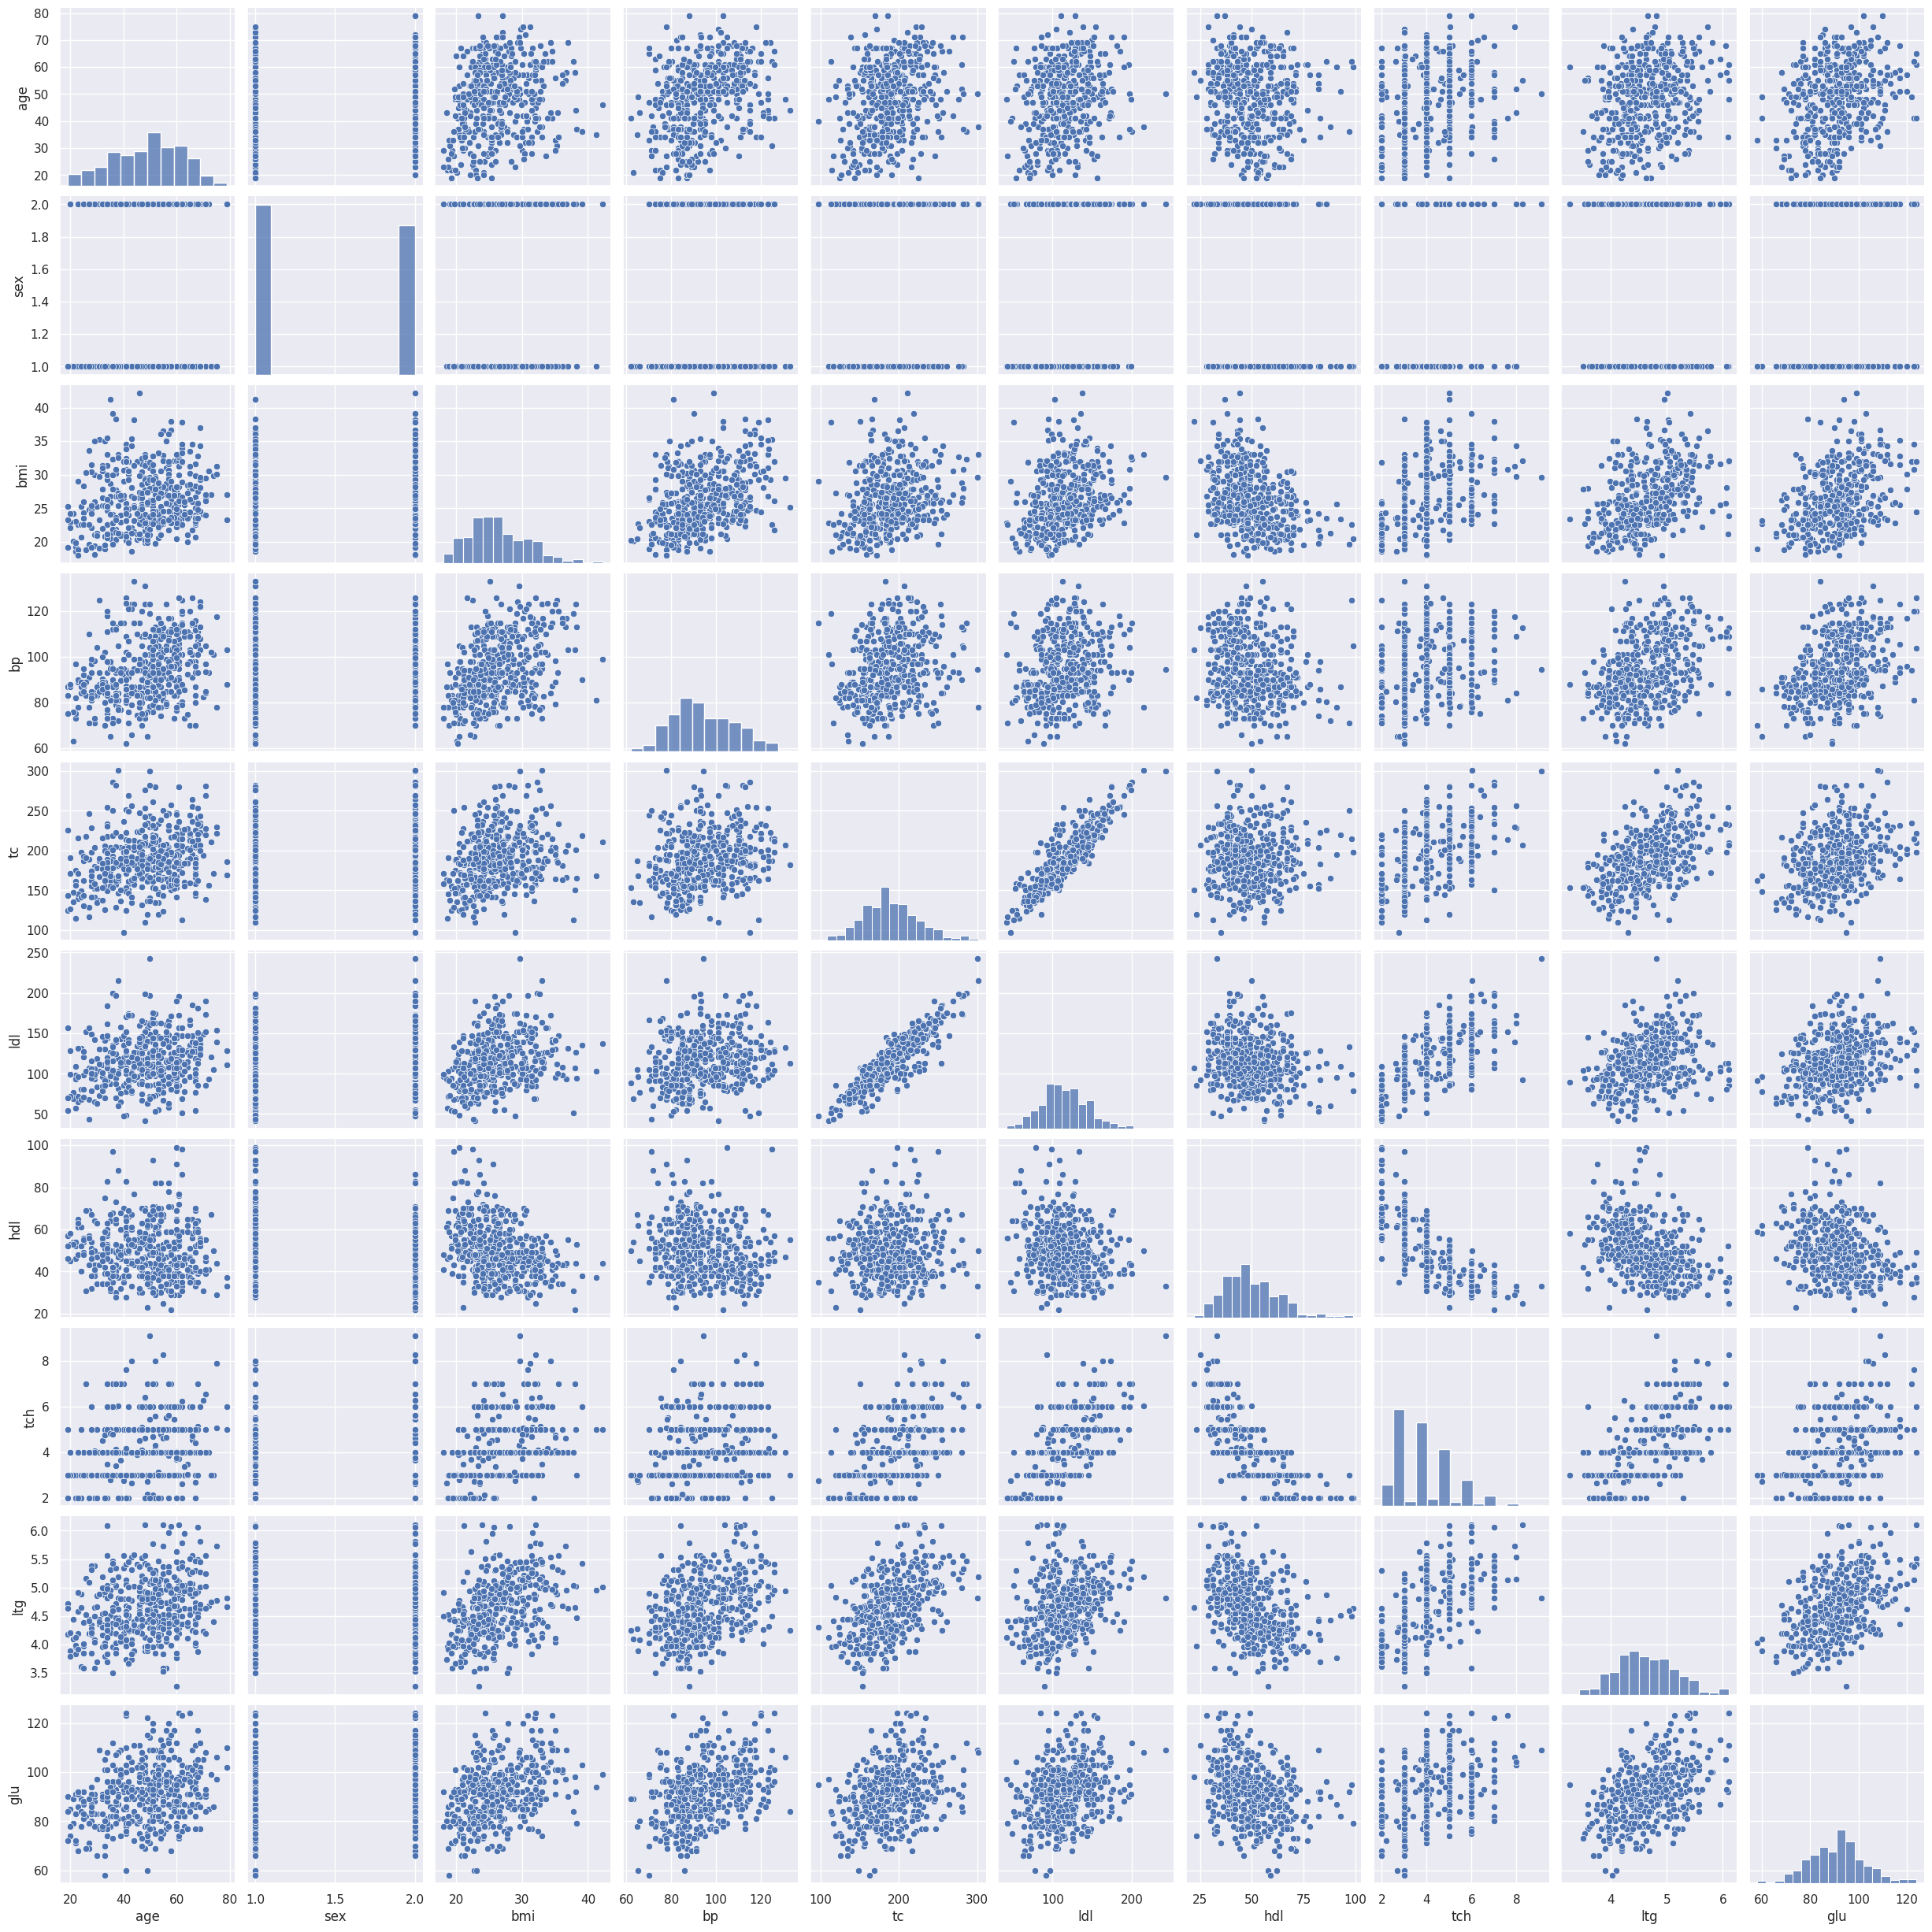

In [ ]:
sns.pairplot(X);

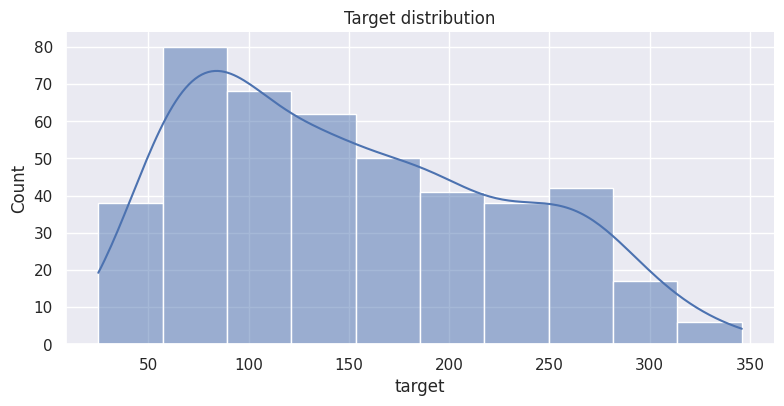

In [ ]:
# Plot the target distribution
sns.displot(y, kde=True, height=4, aspect=2)
plt.title("Target distribution");

Check if there are missing values.

In [ ]:
X.isna().any()

age    False
sex    False
bmi    False
bp     False
tc     False
ldl    False
hdl    False
tch    False
ltg    False
glu    False
dtype: bool

Check correlation between feature variables

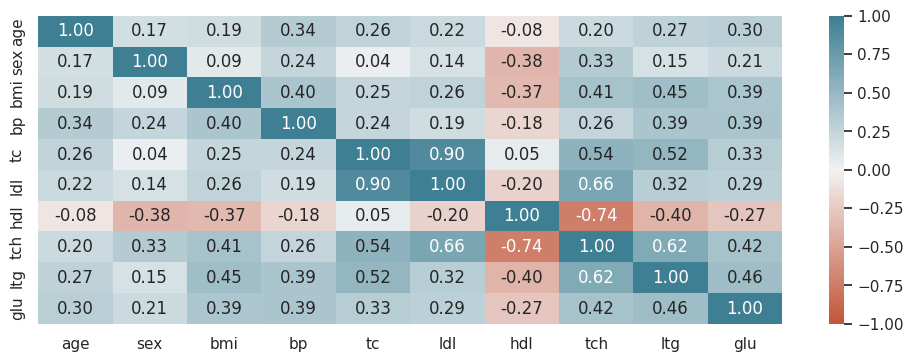

In [ ]:
cmap_corr = sns.diverging_palette(20, 220, n=200)
sns.heatmap(X.corr(), cmap=cmap_corr, vmin=-1, vmax=1, annot=True, fmt='.2f');

The correlation between `tc` and `ldl` is quite high. It can negatively affect a linear model.

Check correlation between feature variables and the target.

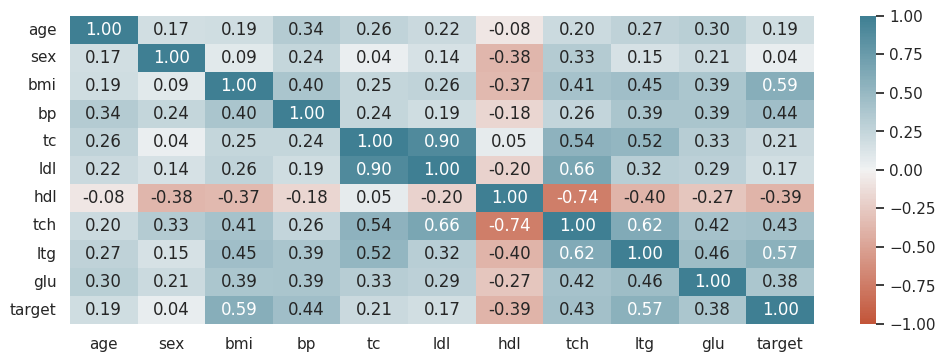

In [ ]:
sns.heatmap(pd.concat([X,y], axis=1).corr(), cmap=cmap_corr, vmin=-1, vmax=1, annot=True, fmt='.2f');

The features that have the highest correlation with the target are `bmi`, body mass index (0.59), and `ltg`, possibly log of serum triglycerides level (0.57). Check the relationship between each of these two features and the target.

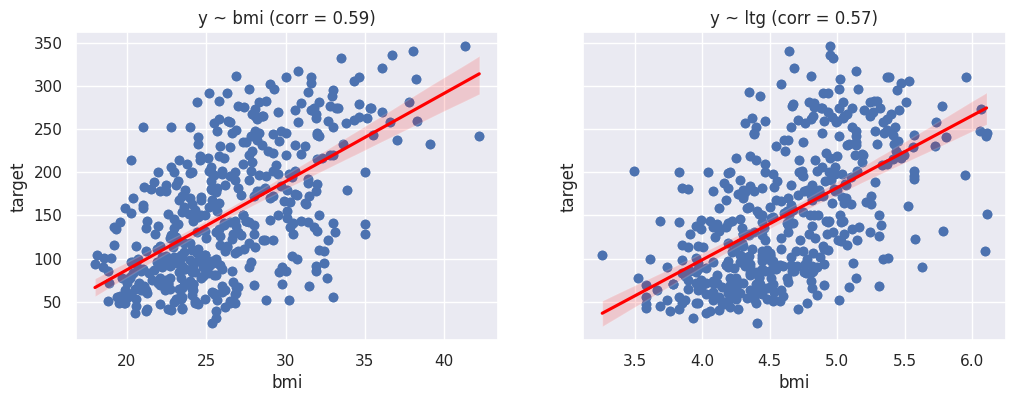

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True)

ax[0].scatter(X['bmi'], y)
sns.regplot(x=X['bmi'], y=y, line_kws={"color": "red"}, ax=ax[0])
ax[0].set_title("y ~ bmi (corr = 0.59)")
ax[0].set_xlabel("bmi")
ax[0].set_ylabel("target")

ax[1].scatter(X['ltg'], y)
sns.regplot(x=X['ltg'], y=y, line_kws={"color": "red"}, ax=ax[1])
ax[1].set_title("y ~ ltg (corr = 0.57)")
ax[1].set_xlabel("bmi")
ax[1].set_ylabel("target")

plt.show()

## Modeling and evaluation

### Splitting data

Split data on train and test subsets. It is done in a random way. If you want to be able to reproduce the results of your code, you need to fix the value of the `random_state` argument.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


### Simple model with 1 feature

#### Training

Train a model using [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) algorithm and check its quality using [MSE (mean squared error)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

More details on [formatted string literals](https://docs.python.org/3/reference/lexical_analysis.html#f-strings) that are used for the output.

Let's try to use only one feature - `bmi` (body mass index) - that has the highest correlation with the target.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a class instance
lr = LinearRegression()

# Train the model using train data
lr.fit(X_train[['bmi']], y_train);

In [ ]:
y_pred = lr.predict(X_test[['bmi']])
y_pred = pd.Series(y_pred)
pd.concat([y_test.reset_index(drop=True), y_pred], axis=1)

,target,0
0,219.0,145.806227
1,70.0,188.857390
2,202.0,147.958785
3,230.0,203.925298
4,111.0,131.814599
...,...,...
84,153.0,86.610877
85,98.0,126.433203
86,37.0,88.763435
87,63.0,82.305761


#### Evaluation

In [ ]:
# define an empty dictionary
eval_results = {}

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import Bunch

MODELNAME = 'one feature'
eval_results[MODELNAME] = Bunch()
eval_results[MODELNAME].model = lr

# Make predictions for train and test data using the model
y_pred_train = lr.predict(X_train[['bmi']])
y_pred_test = lr.predict(X_test[['bmi']])

# Evaluation: comparing true values with values predicted by the model
eval_results[MODELNAME].mse_train = mean_squared_error(y_train, y_pred_train)
eval_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
eval_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {eval_results[MODELNAME].mse_train:.2f}')
print(f'MSE on test data: {eval_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {eval_results[MODELNAME].r2_test:.2f}")

# Calculate RMSE to have an idea of error in the same units as the target
# (desease progression quantitative indicator)
eval_results[MODELNAME].rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
eval_results[MODELNAME].rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'\nRMSE on train data: {eval_results[MODELNAME].rmse_train:.2f}')
print(f'RMSE on test data: {eval_results[MODELNAME].rmse_test:.2f}')

print(f'\nMean target value: {y_train.mean():.2f}')

MSE on train data: 3854.11
MSE on test data: 4061.83
R^2 on test data: 0.23

RMSE on train data: 62.08
RMSE on test data: 63.73

Mean target value: 153.74


In [ ]:
eval_results

{'one feature': {'model': LinearRegression(),
  'mse_train': 3854.11265207582,
  'mse_test': 4061.8259284949268,
  'r2_test': 0.23335039815872138,
  'rmse_train': 62.081500079136454,
  'rmse_test': 63.73245584860925}}

#### Understanding results

In [ ]:
# save models parameters
eval_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': lr.feature_names_in_, 'coef': lr.coef_})
display(lr.coef_, lr.intercept_)

array([10.7627909])

-131.87377836094223

So the simple model to predict target values is: $y = 10.7628 \times bmi - 131.8738$

In [ ]:
print(lr.coef_[0] * X_test['bmi'].iloc[0] + lr.intercept_)
print(lr.predict(X_test[['bmi']])[0])

145.8062268746538
145.8062268746538


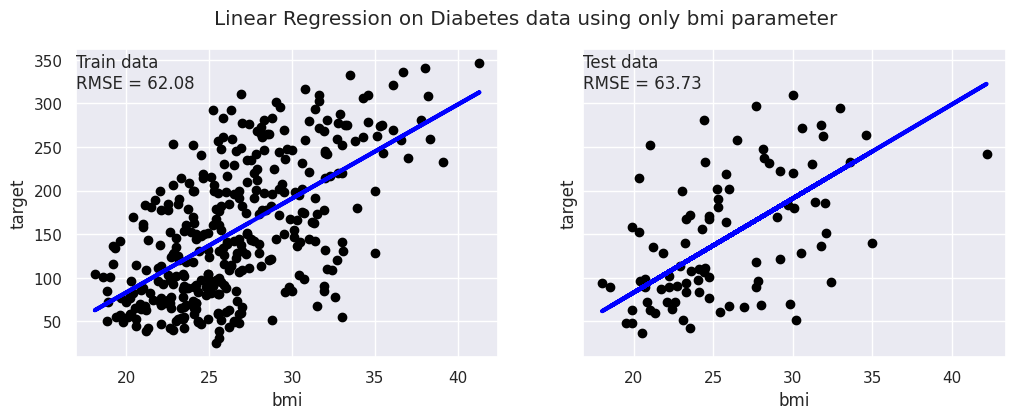

In [ ]:
figure, axis = plt.subplots(1, 2, sharey=True)

axis[0].scatter(X_train['bmi'], y_train, color="black")
axis[0].plot(X_train['bmi'], y_pred_train, color="blue", linewidth=3)
axis[0].set_title(f"Train data\nRMSE = {eval_results[MODELNAME].rmse_train:.2f}", loc='left', pad=-28)
axis[0].set_xlabel("bmi")
axis[0].set_ylabel("target")

axis[1].scatter(X_test['bmi'], y_test, color="black")
axis[1].plot(X_test['bmi'], y_pred_test, color="blue", linewidth=3)
axis[1].set_title(f"Test data\nRMSE = {eval_results[MODELNAME].rmse_test:.2f}", loc='left', pad=-28)
axis[1].set_xlabel("bmi")
axis[1].set_ylabel("target")

figure.suptitle('Linear Regression on Diabetes data using only bmi parameter')
plt.show()

### Model with all features

#### Training

Let's use all the features.

In [ ]:
# Create a class instance
lr = LinearRegression()

# Train the model using train data
lr.fit(X_train, y_train);

#### Evaluation

In [ ]:
MODELNAME = 'all features'
eval_results[MODELNAME] = Bunch()
eval_results[MODELNAME].model = lr

# Make predictions for train and test data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluation: comparing true values with values predicted by the model
eval_results[MODELNAME].mse_train = mean_squared_error(y_train, y_pred_train)
eval_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
eval_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {eval_results[MODELNAME].mse_train:.2f}')
print(f'MSE on test data: {eval_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {eval_results[MODELNAME].r2_test:.2f}")

# Calculate RMSE to have an idea of error in the same units as the target
# (desease progression quantitative indicator)
eval_results[MODELNAME].rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
eval_results[MODELNAME].rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'\nRMSE on train data: {eval_results[MODELNAME].rmse_train:.2f}')
print(f'RMSE on test data: {eval_results[MODELNAME].rmse_test:.2f}')

print(f'\nMean target value: {y_train.mean():.2f}')

MSE on train data: 2868.55
MSE on test data: 2900.19
R^2 on test data: 0.45

RMSE on train data: 53.56
RMSE on test data: 53.85

Mean target value: 153.74


#### Understanding results

In [ ]:
# save models parameters
eval_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': lr.feature_names_in_, 'coef': lr.coef_})
eval_results[MODELNAME].coef_

,modelname,feature,coef
0,all features,age,0.137688
1,all features,sex,-23.064468
2,all features,bmi,5.846363
3,all features,bp,1.197093
4,all features,tc,-1.281685
5,all features,ldl,0.811152
6,all features,hdl,0.601653
7,all features,tch,10.159539
8,all features,ltg,67.108962
9,all features,glu,0.201599


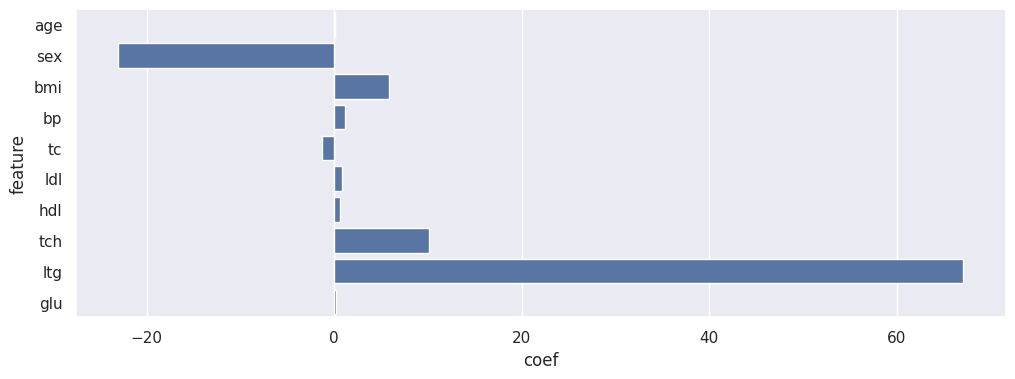

In [ ]:
sns.barplot(data=eval_results[MODELNAME].coef_, y='feature', x='coef', color='b');

### Model with scaled data

#### Scaling

Let's scale features and train a new model.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on train data in order to avoid data leakage
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=scaler.get_feature_names_out())
X_test = pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

Check the resulted features statistics.

In [ ]:
X_train.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
count,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02
mean,-1.761260e-16,-2.138673e-16,3.270912e-16,-2.516086e-17,-3.874773e-16,5.057333e-16,-9.057910e-17,1.509652e-16,7.045041e-16,1.610295e-16
std,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00,1.001419e+00
min,-2.348632e+00,-9.421786e-01,-1.926212e+00,-2.346656e+00,-2.270372e+00,-2.413754e+00,-2.156759e+00,-1.608706e+00,-2.665661e+00,-2.890773e+00
25%,-6.999192e-01,-9.421786e-01,-7.161691e-01,-7.817243e-01,-7.421144e-01,-6.690548e-01,-6.677085e-01,-8.354584e-01,-7.215519e-01,-6.616086e-01
50%,1.636926e-01,-9.421786e-01,-1.453940e-01,-1.415250e-01,-7.890837e-02,-6.993159e-02,-1.191108e-01,-6.221033e-02,-3.827004e-02,2.428813e-02
75%,7.917738e-01,1.061370e+00,6.536911e-01,7.120742e-01,5.554626e-01,5.884456e-01,5.862292e-01,7.110377e-01,6.791760e-01,6.244477e-01
max,2.361977e+00,1.061370e+00,3.370580e+00,2.703805e+00,3.237122e+00,4.196352e+00,3.877815e+00,3.873622e+00,2.771775e+00,2.767875e+00


#### Training

In [ ]:
# Create a class instance
lr = LinearRegression()

# Train the model using train data
lr.fit(X_train, y_train)

LinearRegression()

#### Evaluation

In [ ]:
MODELNAME = 'all features scaled'
eval_results[MODELNAME] = Bunch()
eval_results[MODELNAME].model = lr

# Make predictions for train and test data using the model
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluation: comparing true values with values predicted by the model
eval_results[MODELNAME].mse_train = mean_squared_error(y_train, y_pred_train)
eval_results[MODELNAME].mse_test = mean_squared_error(y_test, y_pred_test)
eval_results[MODELNAME].r2_test = r2_score(y_test, y_pred_test)

print(f'MSE on train data: {eval_results[MODELNAME].mse_train:.2f}')
print(f'MSE on test data: {eval_results[MODELNAME].mse_test:.2f}')
print(f"R^2 on test data: {eval_results[MODELNAME].r2_test:.2f}")

# Calculate RMSE to have an idea of error in the same units as the target
# (desease progression quantitative indicator)
eval_results[MODELNAME].rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
eval_results[MODELNAME].rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f'\nRMSE on train data: {eval_results[MODELNAME].rmse_train:.2f}')
print(f'RMSE on test data: {eval_results[MODELNAME].rmse_test:.2f}')

print(f'\nMean target value: {y_train.mean():.2f}')

MSE on train data: 2868.55
MSE on test data: 2900.19
R^2 on test data: 0.45

RMSE on train data: 53.56
RMSE on test data: 53.85

Mean target value: 153.74


#### Understanding results

The formula used to predict target values is: $y = w_1 \times age + w_2 \times sex + ... + w_{10} \times s6 + intercept$

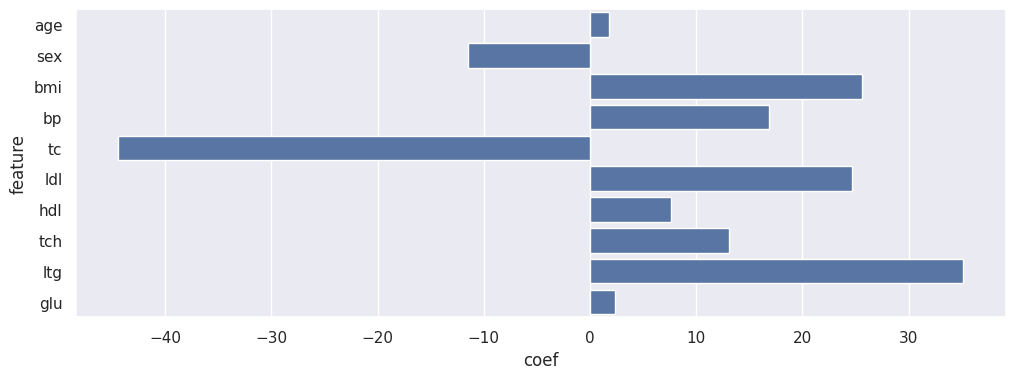

In [ ]:
# save models parameters
eval_results[MODELNAME].coef_ = pd.DataFrame({'modelname': MODELNAME, 'feature': lr.feature_names_in_, 'coef': lr.coef_})
sns.barplot(data=eval_results[MODELNAME].coef_, y='feature', x='coef', color='b');

### Final results

In [ ]:
eval_results

{'one feature': {'model': LinearRegression(),
  'mse_train': 3854.11265207582,
  'mse_test': 4061.8259284949268,
  'r2_test': 0.23335039815872138,
  'rmse_train': 62.081500079136454,
  'rmse_test': 63.73245584860925,
  'coef_':      modelname feature       coef
  0  one feature     bmi  10.762791},
 'all features': {'model': LinearRegression(),
  'mse_train': 2868.549702835577,
  'mse_test': 2900.193628493481,
  'r2_test': 0.4526027629719196,
  'rmse_train': 53.558843367230935,
  'rmse_test': 53.85344583676592,
  'coef_':       modelname feature       coef
  0  all features     age   0.137688
  1  all features     sex -23.064468
  2  all features     bmi   5.846363
  3  all features      bp   1.197093
  4  all features      tc  -1.281685
  5  all features     ldl   0.811152
  6  all features     hdl   0.601653
  7  all features     tch  10.159539
  8  all features     ltg  67.108962
  9  all features     glu   0.201599},
 'all features scaled': {'model': LinearRegression(),
  'mse_trai

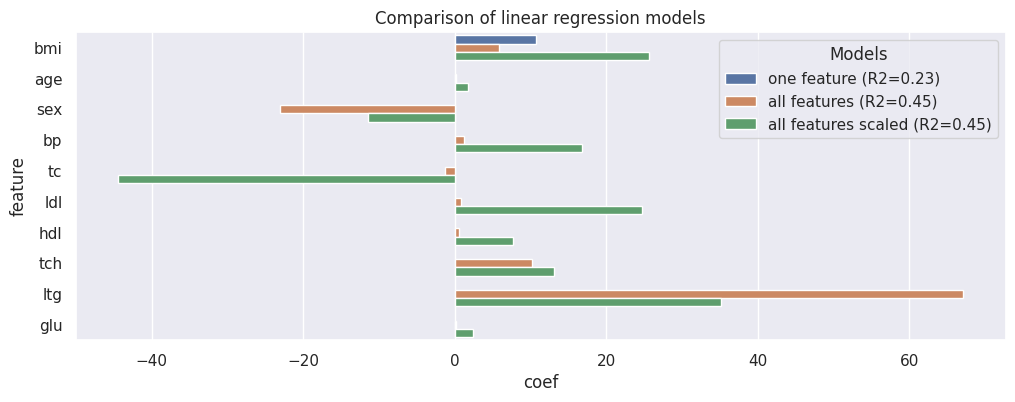

In [ ]:
modelnames = ['one feature', 'all features', 'all features scaled']
labels = [f'{x} (R2={eval_results[x].r2_test:.2f})' for x in modelnames]

coef_ = pd.concat([
    eval_results[modelnames[0]].coef_,
    eval_results[modelnames[1]].coef_,
    eval_results[modelnames[2]].coef_])

g = sns.barplot(data=coef_, y='feature', x='coef', hue='modelname')

# replace legend labels
for i, t in enumerate(g.legend().texts):
    t.set_text(labels[i])
# add legend title and change location
sns.move_legend(g, "upper right", title='Models')

plt.title('Comparison of linear regression models');